# IMPORTS AND SETUP

In [1]:
%matplotlib inline
import pandas as pd
import tkinter as tk
from collections import OrderedDict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from enum import Enum
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
unclean_detailed_info = pd.read_csv('Resources\BoardGames\games_detailed_info.csv')

In [3]:
clean_detailed_info = unclean_detailed_info.drop(['Unnamed: 0', 'type', 'id', 'thumbnail', 'image', 'primary',
       'alternate', 'description', 'yearpublished', 'boardgameexpansion', 'boardgameimplementation',
       'boardgamedesigner', 'boardgameartist', 'boardgamepublisher', 'boardgameintegration', 'boardgamecompilation', 'boardgamecategory',
       'boardgamemechanic', 'boardgamefamily', 'RPG Item Rank', 'Accessory Rank', 'Video Game Rank', 'Amiga Rank',
       'Commodore 64 Rank', 'Arcade Rank', 'Atari ST Rank', 'bayesaverage', 'Board Game Rank', 'Customizable Rank',  'owned', 'trading', 'wanting',
       'wishing', 'numcomments', 'usersrated', 'minplayers', 'maxplayers',  'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'average'], axis=1)

# FUNCTIONS

In [4]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

In [5]:
language_value = {
    'NO' : 1,
    'SOME' : 2,
    'MODERATE' : 3,
    'EXTENSIVE' : 4,
    'UNPLAYABLE' : 5
}

def normalize_language_dependence(game):
    sum_of_weighted_language = 0
    total_num_votes = 0
    for level in game:
        print(level)
        value_key = level['@value'].split(' ')[0].upper()
        language_multiplier = language_value[value_key]
        votes = int(level['@numvotes'])
        total_num_votes += votes
        sum_of_weighted_language += language_multiplier * votes
    return (sum_of_weighted_language / total_num_votes) if total_num_votes > 0 else 0

In [6]:
def add_brackets_and_eval(string_item):
    string_item = str(string_item)
    if string_item[0] != '[':
        string_item = '[' + str(string_item)
    if string_item[-1] != ']':
        string_item = str(string_item) + ']'
    return eval(string_item)

In [7]:
def is_empty_playercount(game):
    for playercount in game:
        if 'result' in playercount:
            return True
        else: 
            return False

In [8]:
def calculate_age_from_ordered_dict(game):
    weighted_age_sum = 0
    total_votes = 0
    for age in game:
        votes = age['@numvotes']
        if age['@value'].isnumeric():
            age_num = age['@value']
        else:
            age_num = 25
        weighted_age_sum += int(age_num) * int(votes) 
        total_votes += int(votes)
    if total_votes:
        return weighted_age_sum/total_votes
    else:
        return 0

In [9]:
result_value = {
    'BEST' : 3,
    'RECOMMENDED' : 2,
    'NOTRECOMMENDED' : 1   
}

def calculate_players_from_ordered_dict(game):
    playercount_normalized_results = {}
    for playercount in game:
        if not 'result' in playercount:
            return 0
        total_votes = 0
        result_total_result = 0
        result_normalized_result = 0
        for result in playercount['result']:
            current_player_count = result['@value']
            multiplier = result_value[result['@value'].upper().replace(' ', '')]
            total_votes += int(result['@numvotes'])
            result_total_result += int(result['@numvotes']) * multiplier
        if(total_votes):
            result_normalized_result = result_total_result / total_votes
        else:
            result_normalized_result = 0
            result_normalized_result = 0
        playercount_normalized_results[playercount['@numplayers']]=result_normalized_result
    sum_of_weighted_players = 0
    sum_of_keys = 0
    num_of_keys = 0
    for key in playercount_normalized_results.keys():
        if not key.isnumeric():
            num = int(key[:-1]) + 1
        else:
            num = int(key)
        sum_of_weighted_players += num * (playercount_normalized_results[key]/3)
        sum_of_keys += num
        num_of_keys += 1
    return (sum_of_weighted_players)/(sum_of_keys/num_of_keys)


# DATA CLEANING

In [10]:
clean_detailed_info = clean_detailed_info.fillna(0)

In [11]:
clean_detailed_info['suggested_num_players'] = clean_detailed_info['suggested_num_players'].apply(add_brackets_and_eval)
clean_detailed_info['suggested_num_players'] = clean_detailed_info['suggested_num_players'].apply(calculate_players_from_ordered_dict)

In [12]:
clean_detailed_info = clean_detailed_info[clean_detailed_info['suggested_playerage'] != 0]
clean_detailed_info['suggested_playerage'] = clean_detailed_info['suggested_playerage'].apply(add_brackets_and_eval)
clean_detailed_info['suggested_playerage'] = clean_detailed_info['suggested_playerage'].apply(calculate_age_from_ordered_dict)

In [13]:
clean_detailed_info = clean_detailed_info[clean_detailed_info['suggested_language_dependence'] != 0]
clean_detailed_info['suggested_language_dependence'] = clean_detailed_info['suggested_language_dependence'].apply(add_brackets_and_eval)
clean_detailed_info['suggested_language_dependence'] = clean_detailed_info['suggested_language_dependence'].apply(normalize_language_dependence)

OrderedDict([('@level', '16'), ('@value', 'No necessary in-game text'), ('@numvotes', '10')])
OrderedDict([('@level', '17'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '258')])
OrderedDict([('@level', '18'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '42')])
OrderedDict([('@level', '19'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '3')])
OrderedDict([('@level', '20'), ('@value', 'Unplayable in another language'), ('@numvotes', '1')])
OrderedDict([('@level', '41'), ('@value', 'No necessary in-game text'), ('@numvotes', '444')])
OrderedDict([('@level', '42'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '7')])
OrderedDict([('@level', '43'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '1')])
OrderedDict([('@level', '44'), ('@value', 'Extensive use of text - massive conversio

OrderedDict([('@level', '5'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '861'), ('@value', 'No necessary in-game text'), ('@numvotes', '20')])
OrderedDict([('@level', '862'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '863'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '864'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '865'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '1'), ('@value', 'No necessary in-game text'), ('@numvotes', '29')])
OrderedDict([('@level', '2'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '3')])
OrderedDict([('@level', '3'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvote

OrderedDict([('@level', '391'), ('@value', 'No necessary in-game text'), ('@numvotes', '10')])
OrderedDict([('@level', '392'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '12')])
OrderedDict([('@level', '393'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '394'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '395'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '11'), ('@value', 'No necessary in-game text'), ('@numvotes', '19')])
OrderedDict([('@level', '12'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '13'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '14'), ('@value', 'Extensive use of text - massive convers

OrderedDict([('@level', '7'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '1')])
OrderedDict([('@level', '8'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '9'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '10'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '46'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '47'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '6')])
OrderedDict([('@level', '48'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '3')])
OrderedDict([('@level', '49'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '50'), ('@value', 'Unplayable 

OrderedDict([('@level', '19'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '20'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '136'), ('@value', 'No necessary in-game text'), ('@numvotes', '16')])
OrderedDict([('@level', '137'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '138'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '139'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '140'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '421'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '422'), ('@value', 'Some necessary text - easily memorized or small crib she

OrderedDict([('@level', '963'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '964'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '965'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '176'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '177'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '1')])
OrderedDict([('@level', '178'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '4')])
OrderedDict([('@level', '179'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '180'), ('@value', 'Unplayable in another language'), ('@numvotes', '1')])
OrderedDict([('@level', '606'), ('@value', 'No necessary in-game text')

OrderedDict([('@level', '474'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '475'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '211'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '212'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '3')])
OrderedDict([('@level', '213'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '1')])
OrderedDict([('@level', '214'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '215'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '66'), ('@value', 'No necessary in-game text'), ('@numvotes', '5')])
OrderedDict([('@level', '67'), ('@value', 'Some necessary text - easily memorized or small crib shee

OrderedDict([('@level', '746'), ('@value', 'No necessary in-game text'), ('@numvotes', '2')])
OrderedDict([('@level', '747'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '748'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '749'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '750'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '11'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '12'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '4')])
OrderedDict([('@level', '13'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '1')])
OrderedDict([('@level', '14'), ('@value', 'Extensive use of text - massive conversion

OrderedDict([('@level', '913'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '2')])
OrderedDict([('@level', '914'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '915'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '66'), ('@value', 'No necessary in-game text'), ('@numvotes', '10')])
OrderedDict([('@level', '67'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '68'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '69'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '70'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '206'), ('@value', 'No necessary in-game text'), ('

OrderedDict([('@level', '111'), ('@value', 'No necessary in-game text'), ('@numvotes', '1')])
OrderedDict([('@level', '112'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '113'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '114'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '115'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '31'), ('@value', 'No necessary in-game text'), ('@numvotes', '3')])
OrderedDict([('@level', '32'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '1')])
OrderedDict([('@level', '33'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '34'), ('@value', 'Extensive use of text - massive conversion

OrderedDict([('@level', '62'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '1')])
OrderedDict([('@level', '63'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '64'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '65'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '76'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '77'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '78'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '4')])
OrderedDict([('@level', '79'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '80'), ('@value', 'Unplayab

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



OrderedDict([('@level', '1'), ('@value', 'No necessary in-game text'), ('@numvotes', '1')])
OrderedDict([('@level', '2'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '3'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '4'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '5'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '176'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '177'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '178'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '179'), ('@value', 'Extensive use of text - massive conversion neede

OrderedDict([('@level', '120'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '36'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '37'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '38'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '39'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '40'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '96'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '97'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '2')])
OrderedDict([('@level', '98'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes'

OrderedDict([('@level', '27'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '28'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '29'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '30'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '211'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '212'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '213'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '214'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '215'), ('@value', 'Unp

OrderedDict([('@level', '109'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '110'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '101'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '102'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '103'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '104'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '105'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '111'), ('@value', 'No necessary in-game text'), ('@numvotes', '1')])
OrderedDict([('@level', '112'), ('@value', 'Some necessary text - easily memorized or small crib sh

OrderedDict([('@level', '18'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '19'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '20'), ('@value', 'Unplayable in another language'), ('@numvotes', '1')])
OrderedDict([('@level', '111'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '112'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '1')])
OrderedDict([('@level', '113'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '114'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '115'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '11'), ('@value', 'No necessary in-game text'), ('

OrderedDict([('@level', '77'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '78'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '79'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '80'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '61'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '62'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '1')])
OrderedDict([('@level', '63'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '1')])
OrderedDict([('@level', '64'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '65'), ('@value', 'Unplayab

OrderedDict([('@level', '67'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '68'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '69'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '1')])
OrderedDict([('@level', '70'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '61'), ('@value', 'No necessary in-game text'), ('@numvotes', '1')])
OrderedDict([('@level', '62'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '63'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '64'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '65'), ('@value', 'Unplayab

OrderedDict([('@level', '50'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '71'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '72'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '73'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '1')])
OrderedDict([('@level', '74'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '75'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '831'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '832'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '833'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvote

OrderedDict([('@level', '75'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '11'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '12'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '13'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '14'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '15'), ('@value', 'Unplayable in another language'), ('@numvotes', '1')])
OrderedDict([('@level', '6'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '7'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '8'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '1

OrderedDict([('@level', '15'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '86'), ('@value', 'No necessary in-game text'), ('@numvotes', '3')])
OrderedDict([('@level', '87'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '88'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '89'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '90'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '21'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '22'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '3')])
OrderedDict([('@level', '23'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes',

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
clean_detailed_info = clean_detailed_info[clean_detailed_info['suggested_num_players'] > 0]
clean_detailed_info = clean_detailed_info[clean_detailed_info['suggested_playerage'] > 0]
clean_detailed_info = clean_detailed_info[clean_detailed_info['suggested_language_dependence'] > 0]

# PRINTOUTS

In [15]:
print(unclean_detailed_info.columns)
print(unclean_detailed_info)

Index(['Unnamed: 0', 'type', 'id', 'thumbnail', 'image', 'primary',
       'alternate', 'description', 'yearpublished', 'minplayers', 'maxplayers',
       'suggested_num_players', 'suggested_playerage',
       'suggested_language_dependence', 'playingtime', 'minplaytime',
       'maxplaytime', 'minage', 'boardgamecategory', 'boardgamemechanic',
       'boardgamefamily', 'boardgameexpansion', 'boardgameimplementation',
       'boardgamedesigner', 'boardgameartist', 'boardgamepublisher',
       'usersrated', 'average', 'bayesaverage', 'Board Game Rank',
       'Strategy Game Rank', 'Family Game Rank', 'stddev', 'median', 'owned',
       'trading', 'wanting', 'wishing', 'numcomments', 'numweights',
       'averageweight', 'boardgameintegration', 'boardgamecompilation',
       'Party Game Rank', 'Abstract Game Rank', 'Thematic Rank',
       'War Game Rank', 'Customizable Rank', 'Children's Game Rank',
       'RPG Item Rank', 'Accessory Rank', 'Video Game Rank', 'Amiga Rank',
       'Commod

In [16]:
print(clean_detailed_info.columns)
print(clean_detailed_info)

Index(['suggested_num_players', 'suggested_playerage',
       'suggested_language_dependence', 'Strategy Game Rank',
       'Family Game Rank', 'stddev', 'median', 'numweights', 'averageweight',
       'Party Game Rank', 'Abstract Game Rank', 'Thematic Rank',
       'War Game Rank', 'Children's Game Rank'],
      dtype='object')
       suggested_num_players  suggested_playerage  \
0                   3.294766             9.734205   
1                   3.650544             7.615527   
2                   3.075150             8.862408   
3                   5.159062            10.004464   
4                   3.181440             9.691038   
...                      ...                  ...   
19222               2.333333            16.000000   
19225               3.000000             8.000000   
19226               3.809524             8.000000   
19227               3.133333             6.000000   
19229               3.859259            14.400000   

       suggested_language_depend

In [17]:
clean_detailed_info.shape[0]

12091

In [18]:
clean_detailed_info

suggested_num_players  suggested_playerage  \
0                   3.294766             9.734205   
1                   3.650544             7.615527   
2                   3.075150             8.862408   
3                   5.159062            10.004464   
4                   3.181440             9.691038   
...                      ...                  ...   
19222               2.333333            16.000000   
19225               3.000000             8.000000   
19226               3.809524             8.000000   
19227               3.133333             6.000000   
19229               3.859259            14.400000   

       suggested_language_dependence  Strategy Game Rank  Family Game Rank  \
0                           2.130573               104.0              10.0   
1                           1.028698                 0.0              34.0   
2                           2.034268               348.0             108.0   
3                           1.251295                58.0               6.0   
4                           3.145585                89.0               0.0   
...                              ...                 ...               ...   
19222                       3.500000                 0.0               0.0   
19225                       1.000000                 0.0               0.0   
19226                       2.000000                 0.0               0.0   
19227                       1.000000                 0.0               0.0   
19229                       2.000000                 0.0               0.0   

        stddev  median  numweights  averageweight  Party Game Rank  \
0      1.32632       0        5232         2.4148              0.0   
1      1.30369       0        7304         1.9158              0.0   
2      1.47908       0        7187         2.3264              0.0   
3      1.27618       0        4423         2.3321              0.0   
4      1.42504       0        4850         2.3586              0.0   
...        ...     ...         ...            ...              ...   
19222  1.37190       0           9         2.4444              0.0   
19225  2.01694       0           1         1.0000              0.0   
19226  1.91348       0           2         2.0000              0.0   
19227  1.52388       0           1         1.0000              0.0   
19229  1.80247       0           7         3.2857              0.0   

       Abstract Game Rank  Thematic Rank  War Game Rank  Children's Game Rank  
0                     0.0            0.0            0.0                   0.0  
1                     0.0            0.0            0.0                   0.0  
2                     0.0            0.0            0.0                   0.0  
3                     0.0            0.0            0.0                   0.0  
4                     0.0            0.0            0.0                   0.0  
...                   ...            ...            ...                   ...  
19222                 0.0            0.0         2373.0                   0.0  
19225                 0.0            0.0            0.0                   0.0  
19226                 0.0            0.0            0.0                   0.0  
19227                 0.0            0.0            0.0                   0.0  
19229                 0.0            0.0         2717.0                   0.0  

[12091 rows x 14 columns]

# APPLICATION

# TESTING

In [19]:
print(clean_detailed_info.columns)
# clean_detailed_info[clean_detailed_info['Customizable Rank'] > 0]

Index(['suggested_num_players', 'suggested_playerage',
       'suggested_language_dependence', 'Strategy Game Rank',
       'Family Game Rank', 'stddev', 'median', 'numweights', 'averageweight',
       'Party Game Rank', 'Abstract Game Rank', 'Thematic Rank',
       'War Game Rank', 'Children's Game Rank'],
      dtype='object')


In [20]:
train_set, test_set = train_test_split(clean_detailed_info, test_size=0.2, random_state=86, shuffle=True)
scaled_set = StandardScaler().fit_transform(train_set)

In [21]:
scaled_set.shape

(9672, 14)

In [22]:
pca_set = PCA(n_components=2)
principalComponentsGames = pca_set.fit_transform(scaled_set)

In [23]:
principalComponentsGamesDF = pd.DataFrame(data=principalComponentsGames, columns = ['PC1', 'PC2'])
principalComponentsGamesDF.tail()

PC1       PC2
9667  2.218520 -0.030938
9668 -0.194128  0.836969
9669 -0.209153  0.628626
9670  2.501547  2.935712
9671 -1.170621 -0.525856

           PC1       PC2
0     0.358615  0.257847
1    -0.959074 -1.469779
2    -1.800506 -1.945680
3    -1.365238 -0.419350
4     1.614084 -0.834766
...        ...       ...
9667  2.218520 -0.030938
9668 -0.194128  0.836969
9669 -0.209153  0.628626
9670  2.501547  2.935712
9671 -1.170621 -0.525856

[9672 rows x 2 columns]


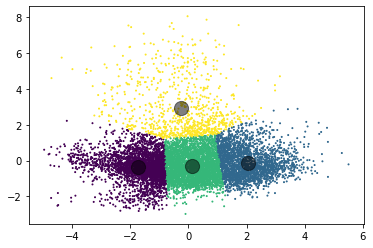

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(principalComponentsGamesDF)
X = principalComponentsGamesDF
print(principalComponentsGamesDF)
y_kmeans = kmeans.predict(principalComponentsGamesDF)


plt.scatter(principalComponentsGamesDF.iloc[:, 0], principalComponentsGamesDF.iloc[:, 1], c=y_kmeans, s=1, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
